In [ ]:
# !pip install --upgrade git+https://github.com/tooha289/DataAnalysisLibrary.git

# 0. Module import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DataAnalysis import eda
from DataAnalysis import preprocessing

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 1. Load & Check Data

In [2]:
df = pd.read_csv('data/train.csv')
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,136429.0,NaN,NaN,NaN,68214.0,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Product ID,136429,9976,L53257,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,136429,3,L,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],136429.0,NaN,NaN,NaN,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,NaN,NaN,NaN,309.94107,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,NaN,NaN,NaN,1520.33111,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,NaN,NaN,NaN,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,NaN,NaN,NaN,104.408901,63.96504,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,NaN,NaN,NaN,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,NaN,NaN,NaN,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# 2. EDA

In [7]:
feature_cols = df.columns.difference(['id', 'Product ID', 'Machine failure'])
numeric_cols = df.columns.difference(['id', 'Product ID', 'Machine failure', 'Type'])
continuos_cols = feature_cols.difference(["TWF", "HDF", "PWF", "OSF", "RNF", "Type"])
discrete_cols = feature_cols.difference(continuos_cols)

In [8]:
dav = eda.DataAnalysisVisualizer()

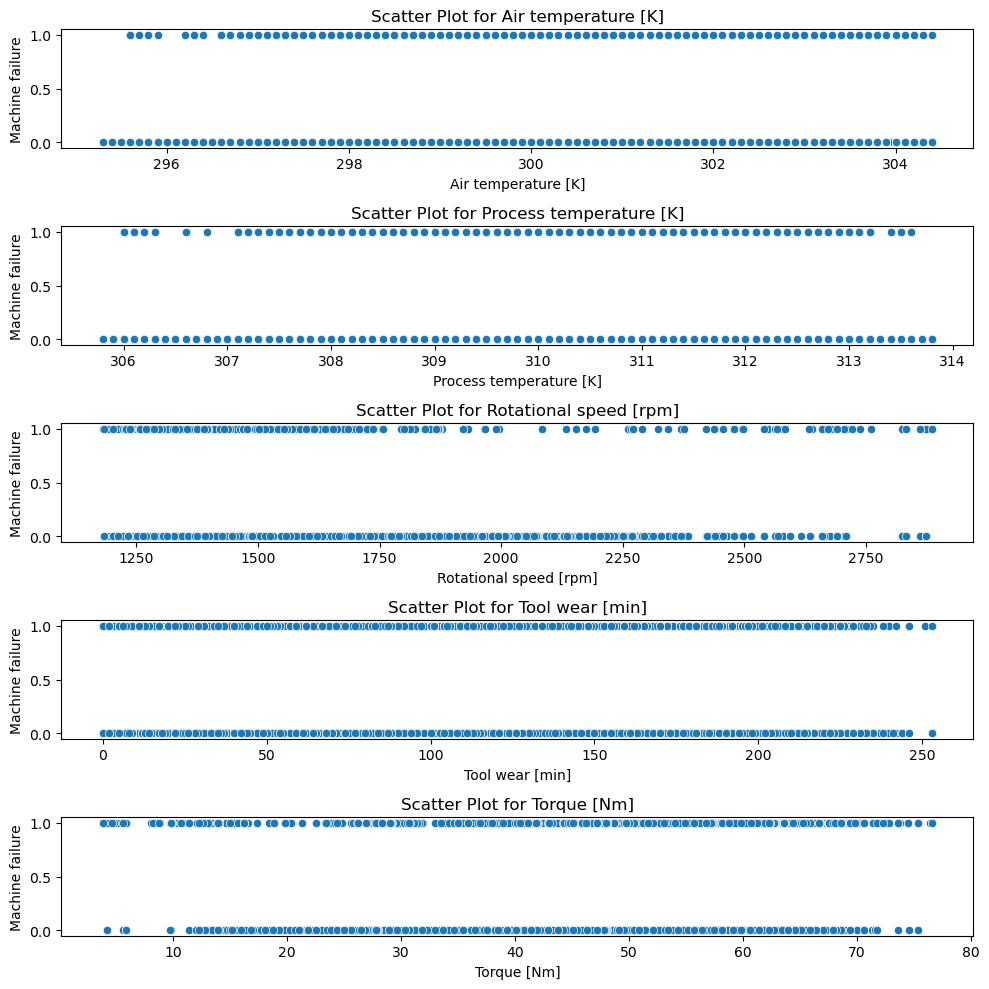

In [20]:
dav.draw_scatterplot(df, continuos_cols,'Machine failure', figsize=(10, 10), figshape=(5,1))

* 연속형 데이터에 대해서 타겟 데이터와 산점도 그래프를 그렸습니다.
* 그래프를 확인했을 때 크게 눈에 띄는 점은 없어 보입니다.
* 다만, 토크의 값이 양 극값에 가까워 지면 기계고장이 비율이 높아 보입니다.
---
* I have plotted a scatterplot graph for the target data against continuous data.
* Upon examining the graph, there don't seem to be any significant outliers.
* However, it appears that as the torque values approach the extreme ends, there is a higher likelihood of machinery breakdowns.

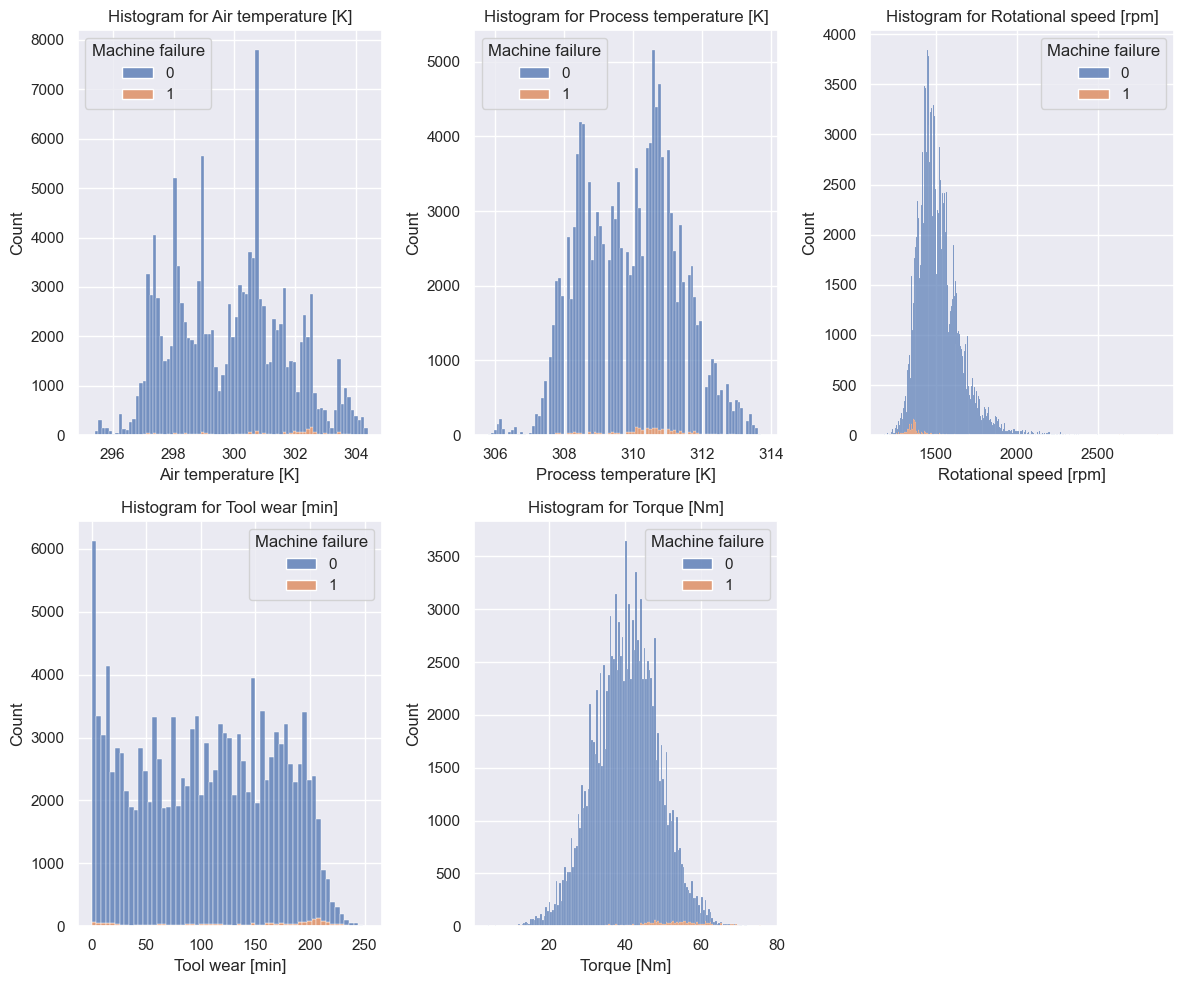

In [26]:
dav.draw_histplot(df, continuos_cols,hue_column='Machine failure',figsize=(12,10), figshape=(2,3), kde=False)

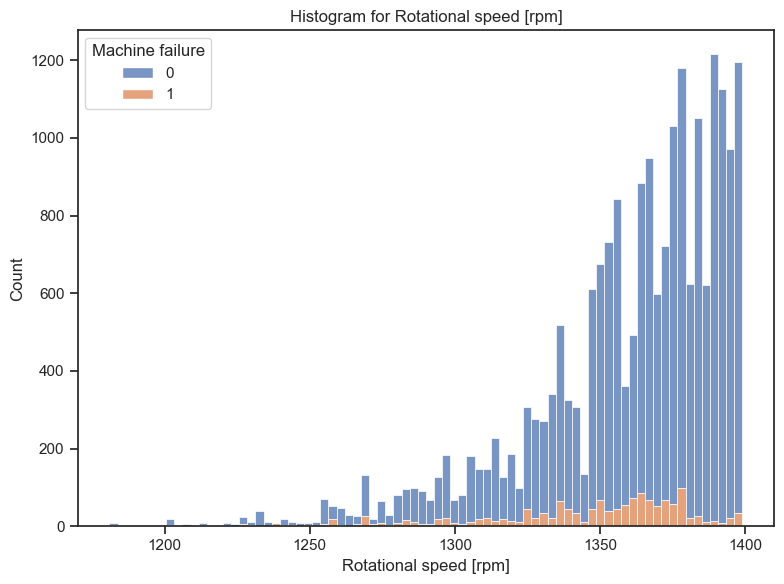

In [32]:
dav.draw_histplot(df.loc[df["Rotational speed [rpm]"]<1400, :], ["Rotational speed [rpm]"],hue_column='Machine failure', figshape=(1,1), kde=False)

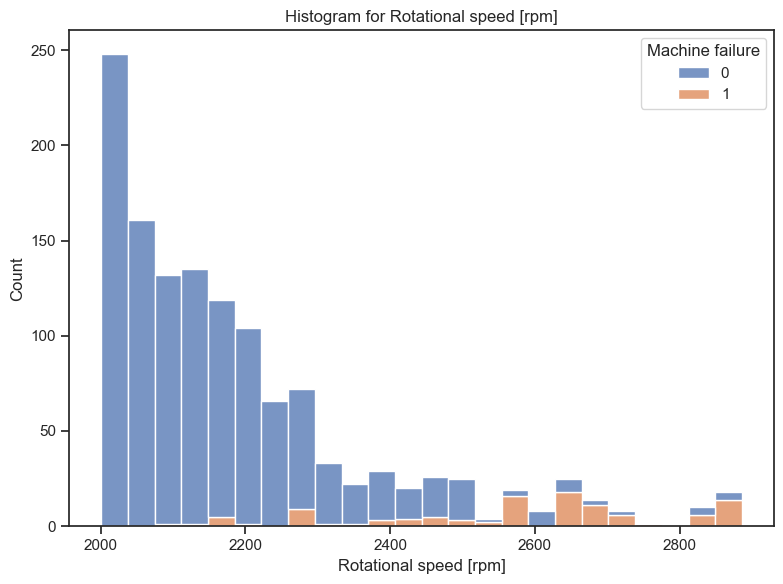

In [33]:
dav.draw_histplot(df.loc[df["Rotational speed [rpm]"]>2000, :], ["Rotational speed [rpm]"],hue_column='Machine failure', figshape=(1,1), kde=False)

* 연속형 변수의 히스토그램입니다.
* 그래프를 확인 했을 때 연속형 변수에서 회전속도를 제외하면 대부분 값이 증가했을 때 기계고장의 비율이 증가하는 경향을 띄는 것 처럼 보입니다.
* 하지만 RPM도 상위 항목만을 확인하면 값이 커질수록 기계고장도 증가한것을 확인 할 수 있습니다.
---
* This is a histogram of continuous variables.
* Upon reviewing the graph, it appears that for most of the continuous variables, excluding rotation speed, there is a tendency for the rate of machinery breakdowns to increase as the values increase.
* However, if we specifically examine the upper ranges of RPM, we can observe that as the values increase, the rate of machinery breakdowns also increases.

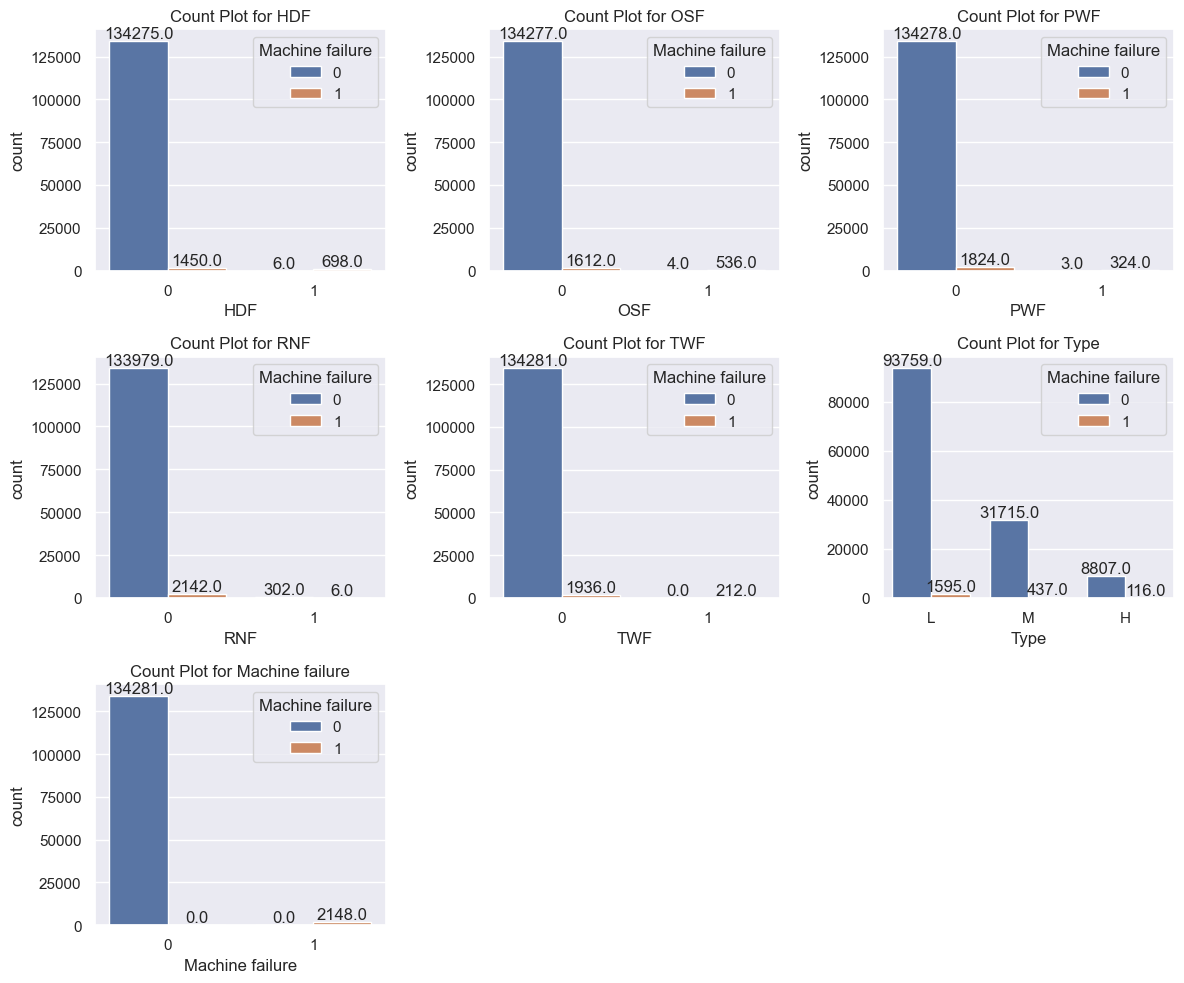

In [27]:
df['Machine failure'] = df['Machine failure'].astype(str)  # "Machine failure" 열을 문자열로 변환
dav.draw_countplot(df, discrete_cols.insert(len(discrete_cols), 'Machine failure'), hue_column='Machine failure', figsize=(12,10), figshape=(3,3))

* 5개의 실패 모드 중 RNF를 제외하면 1일 경우 거의 기계고장인 걸로 확인됩니다.
* RNF의 경우는 기계고장에 큰 영향을 미치지 않는 것으로 보입니다.
* Type의 경우도 타입과 기계고장의 비율이 큰 차이를 보이지 않습니다.
* 하지만 전체적으로 봤을 때 기계고장의 건수가 매우 적습니다.
* 이후 모델링 테스트 후 오버샘플링을 고려하는 것도 방법이 될 수 있어보입니다.
---
* Excluding RNF among the five failure modes, it is evident that when it's equal to 1, there is a high likelihood of machinery breakdown.
* In the case of RNF, it appears to have little impact on machinery breakdowns.
* Regarding the "Type" variable, there doesn't seem to be a significant difference in the ratio of type to machinery breakdowns.
* However, overall, the number of machinery breakdowns is very low.
* Going forward, considering oversampling may be a viable approach after modeling and testing.

In [28]:
df['Machine failure'] = df['Machine failure'].astype("int8")

C:\ProgramData\miniconda3\envs\machine\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


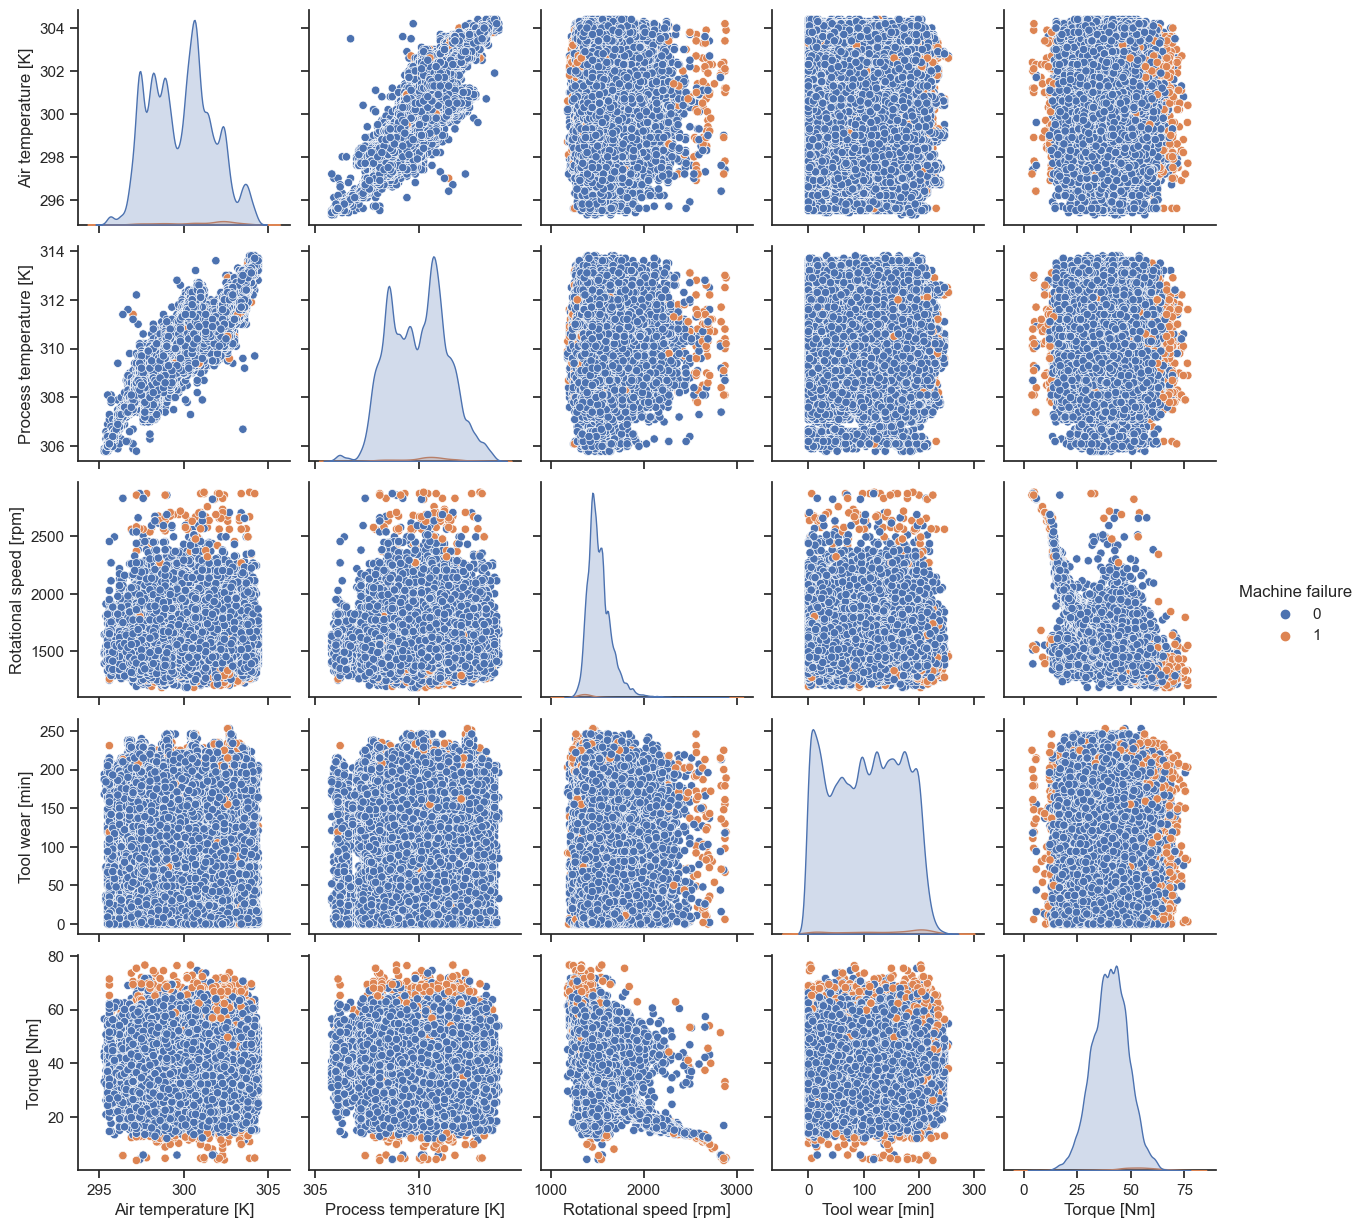

In [31]:
# sample = df.iloc[:1000]
dav.draw_pairplot(df, continuos_cols,hue_column="Machine failure", diag_kind='kde')

* 대부분 위에서 살펴본 그래프의 특성을 반영하고 있습니다.
* 특히 토크의 값은 양 극단에서 기계고장이 많이 확인됩니다.
---
* Most of the characteristics observed in the graphs above are reflected here.
* Particularly, high values of torque are associated with a higher incidence of machinery breakdowns at both extremes.

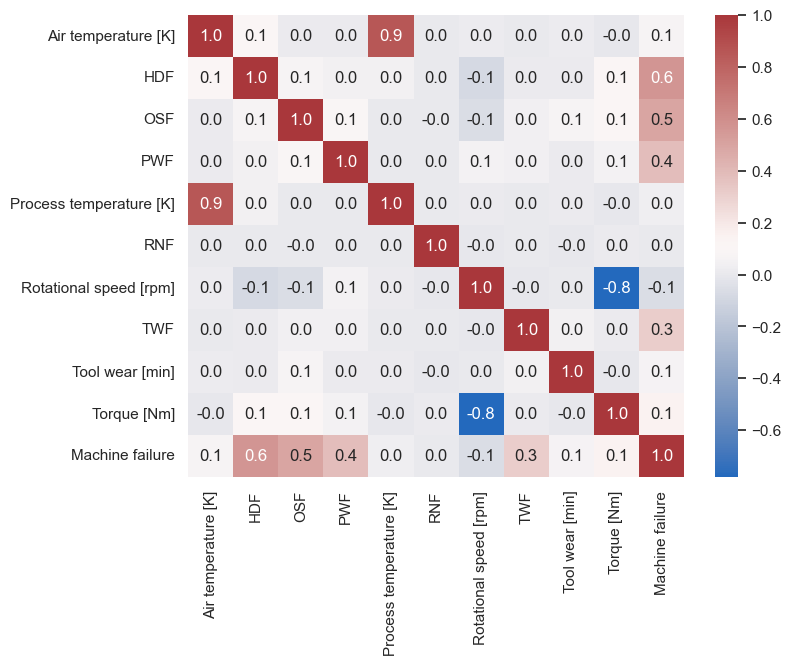

In [24]:
dav.draw_heatmap(df[numeric_cols.insert(len(numeric_cols), 'Machine failure')].corr(), cmap=sns.color_palette("vlag", as_cmap=True))

* 위 pairplot에서 확인한대로 Air temperature와 Process temperature는 높은 양의 상관관계를 가지고 있습니다.
* Torque와 Rotational speed의 경우에도 대부분 음의 상관관계를 가지며 Torque의 값이 증가했을 때 조금 넓은 분포를 가집니다.
* Machine failure와의 상관계수를 살펴보면 실패모드가 역시 높은 상관관계를 가지며 Heat Dissipation Failure가 가장 높고 Random Failure는 거의 상관이 없음을 볼 수 있습니다.
---
* As observed in the pairplot above, Air temperature and Process temperature indeed exhibit a strong positive correlation.
* Torque and Rotational speed also generally have a negative correlation, and torque tends to have a slightly wider distribution as it increases.
* When examining the correlation coefficients with Machine failure, it is evident that failure modes also have significant correlations, with Heat Dissipation Failure being the highest, while Random Failure shows almost no correlation.

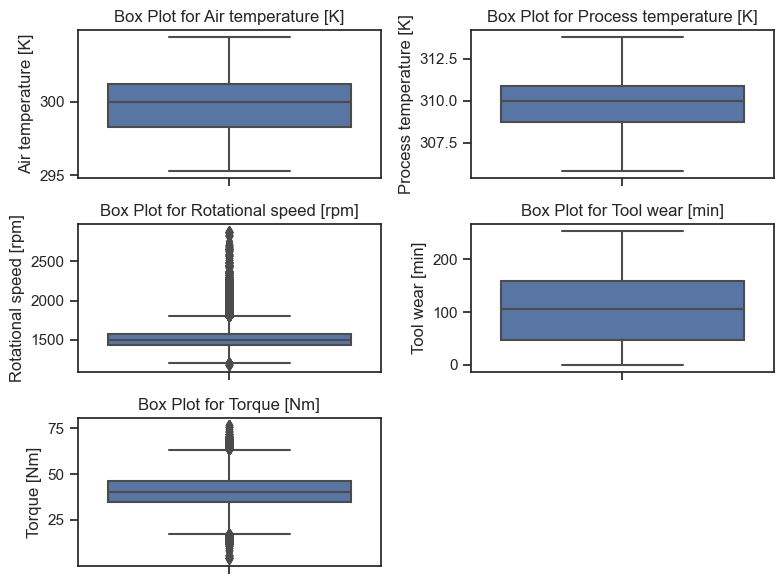

In [30]:
dav.draw_boxplot(df, continuos_cols, x_axis=False, figshape=(3,2))

* Rotational speed도 그렇고 Torque도 그렇고 이상치가 많이 보이는데 데이터의 분포가 한곳에 집중되어 그렇다고 생각됩니다.
---
* Both Rotational speed and Torque appear to have numerous outliers, which is likely due to the data being concentrated in one area of the distribution.

# 3. Conclusion

* 이 후 여러가지 테스트를 수행 할 때 다음을 고려해 볼 수 있습니다.
    1. Machine failure에 대한 오버샘플링
    2. VIF 검사를 통한 피쳐 선택
    3. RNF 피처 제거
---
* In future analyses, you can consider the following:
   1. Oversampling for Machine failure.
   2. Feature selection using VIF (Variance Inflation Factor) testing.
   3. Removing RNF as a feature.